In [27]:
import pandas as pd
import re
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

In [14]:
file_path = r"C:\Users\Neeraj\Downloads\archive (7)\synthetic_social_media_data.csv"
df = pd.read_csv(file_path)
df.head()


,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB


In [16]:
df.isnull().sum()

Post ID                0
Post Content           0
Sentiment Label        0
Number of Likes        0
Number of Shares       0
Number of Comments     0
User Follower Count    0
Post Date and Time     0
Post Type              0
Language               0
dtype: int64

In [17]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'#\w+', '', text) 
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.lower() 
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words] 
    return " ".join(words)

df['cleaned_text'] = df['Post Content'].apply(preprocess_text)

df[['Post Content', 'cleaned_text']].head()


,Post Content,cleaned_text
0,Word who nor center everything better politica...,word center everything better political variou...
1,Begin administration population good president...,begin administration population good president...
2,Thousand total sign. Agree product relationshi...,thousand total sign agree product relationship...
3,Individual from news third. Oil forget them di...,individual news third oil forget different acc...
4,Time adult letter see reduce. Attention sudden...,time adult letter see reduce attention suddenl...


In [28]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment_score)

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

df[['Post Content', 'sentiment_score', 'sentiment_category']].head()


,Post Content,sentiment_score,sentiment_category
0,Word who nor center everything better politica...,0.085119,Positive
1,Begin administration population good president...,0.054545,Positive
2,Thousand total sign. Agree product relationshi...,-0.092857,Negative
3,Individual from news third. Oil forget them di...,0.033333,Positive
4,Time adult letter see reduce. Attention sudden...,0.100000,Positive


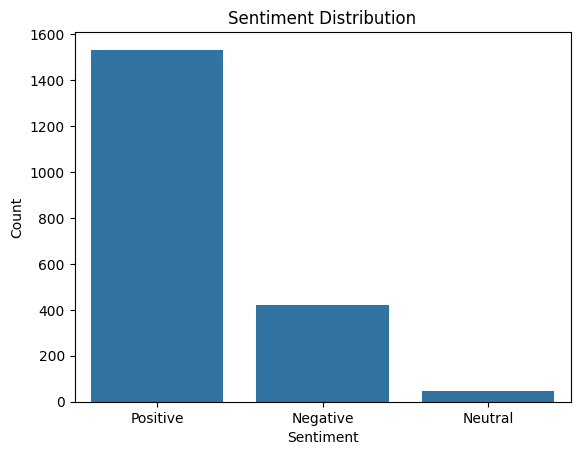

In [19]:
sentiment_counts = df['sentiment_category'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


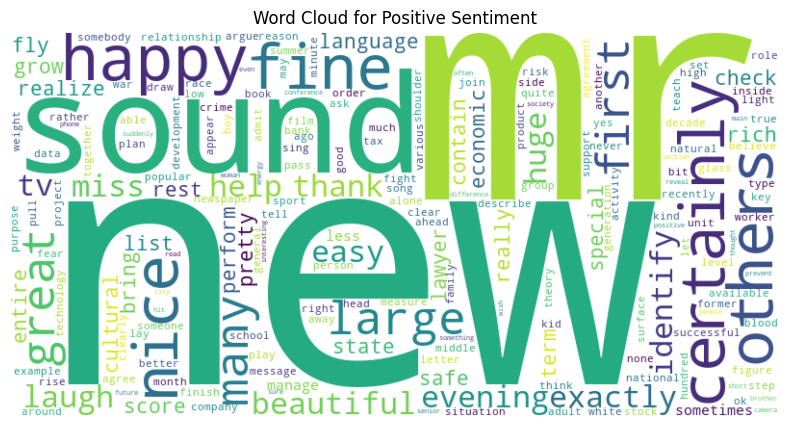

In [20]:
positive_text = " ".join(df[df['sentiment_category'] == 'Positive']['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


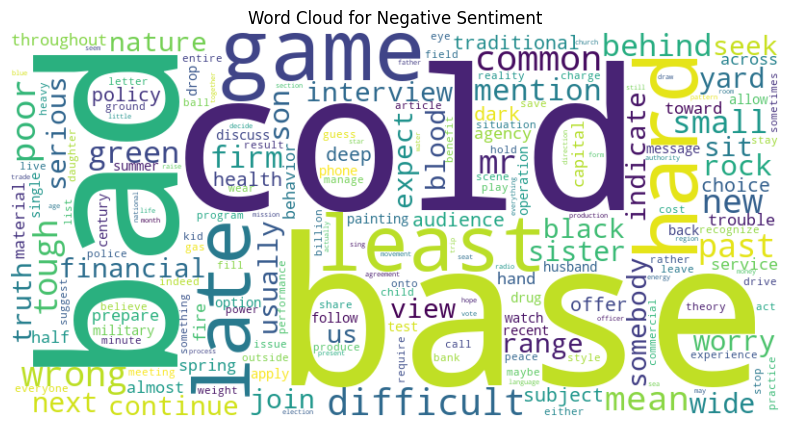

In [21]:
negative_text = " ".join(df[df['sentiment_category'] == 'Negative']['cleaned_text'])

if len(negative_text.strip()) > 0:
    wordcloud_negative = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate(negative_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Sentiment')
    plt.show()
else:
    print("No text data available for Negative sentiment.")


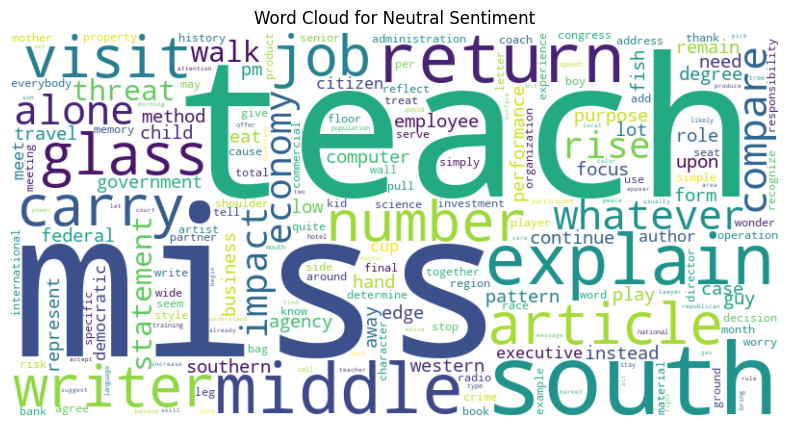

In [22]:
neutral_text = " ".join(df[df['sentiment_category'] == 'Neutral']['cleaned_text'])

if len(neutral_text.strip()) > 0:
    wordcloud_neutral = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate(neutral_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Neutral Sentiment')
    plt.show()
else:
    print("No text data available for Neutral sentiment.")


In [23]:
output_file_path = r"C:\Users\Neeraj\Downloads\processed_sentiment_data.csv"
df.to_csv(output_file_path, index=False)
print(f"Processed data saved at: {output_file_path}")


Processed data saved at: C:\Users\Neeraj\Downloads\processed_sentiment_data.csv


In [29]:
def get_top_words(sentiment, n=10):
    text = " ".join(df[df['sentiment_category'] == sentiment]['cleaned_text'])
    words = text.split()
    return Counter(words).most_common(n)

for sentiment in ['Positive', 'Negative', 'Neutral']:
    print(f"Top words for {sentiment}:")
    print(get_top_words(sentiment))
    print()


Top words for Positive:
[('sound', 84), ('happy', 82), ('certainly', 80), ('others', 80), ('nice', 79), ('fine', 78), ('large', 77), ('great', 77), ('many', 76), ('first', 75)]

Top words for Negative:
[('base', 47), ('cold', 43), ('bad', 40), ('game', 37), ('hard', 37), ('least', 36), ('late', 36), ('difficult', 32), ('wrong', 31), ('common', 31)]

Top words for Neutral:
[('miss', 8), ('teach', 7), ('south', 7), ('explain', 5), ('middle', 5), ('return', 5), ('article', 5), ('glass', 5), ('writer', 5), ('visit', 5)]



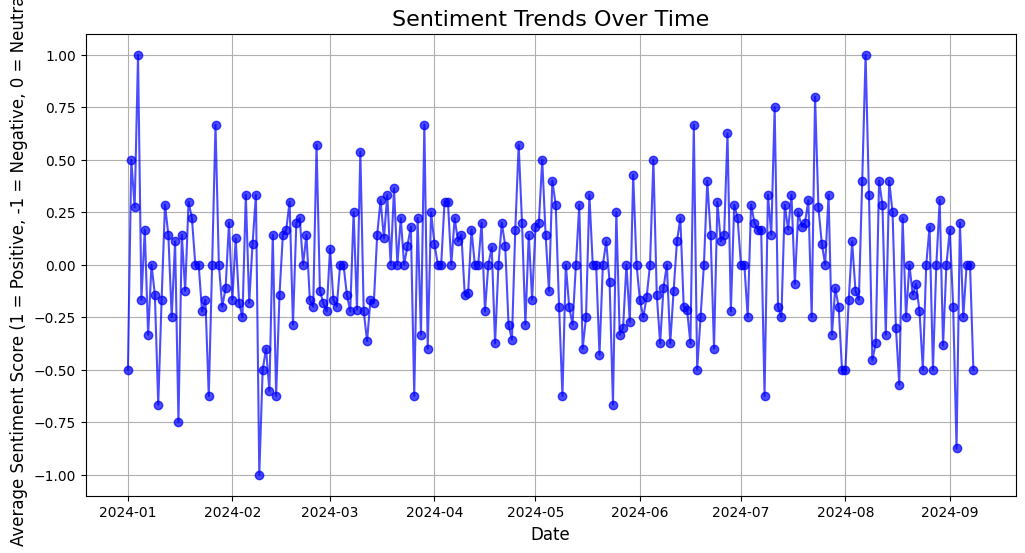

In [30]:
file_path = r"C:\Users\Neeraj\Downloads\processed_sentiment_data.csv"
data = pd.read_csv(file_path)

sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
data['sentiment_score'] = data['Sentiment Label'].map(sentiment_mapping)

data['timestamp'] = pd.to_datetime(data['Post Date and Time'])
data['date'] = data['timestamp'].dt.date  

sentiment_trends = data.groupby('date')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='line', marker='o', color='blue', alpha=0.7)
plt.title("Sentiment Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Sentiment Score (1 = Positive, -1 = Negative, 0 = Neutral)", fontsize=12)
plt.grid(True)
plt.show()


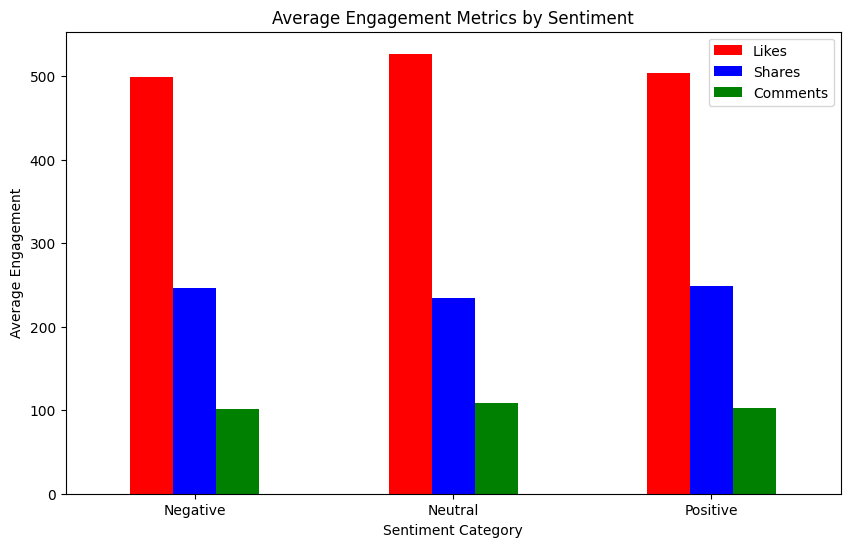

In [31]:
engagement_by_sentiment = data.groupby('sentiment_category')[['Number of Likes', 'Number of Shares', 'Number of Comments']].mean()
engagement_by_sentiment.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title("Average Engagement Metrics by Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Average Engagement")
plt.xticks(rotation=0)
plt.legend(["Likes", "Shares", "Comments"])
plt.show()